In [1]:
%load_ext lab_black
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math as mt
from numpy import linalg as LA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_olivetti_faces

%matplotlib inline

In [2]:
x = np.array([[1], [0]])  # Original vector
x = np.array([1, 0])  # Original vector
theta = 30 * mt.pi / 180  # 30 degress in radian
A = np.array(
    [[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]]
)  # Rotation matrix for theta=30 degrees
B = np.array([[3, 0], [0, 1]])  # Stretching matrix

In [3]:
Ax = A @ x  # Ax is the rotated vector
Bx = B @ x  # Bx is the stretched vector
x, A, B, Ax, Bx

(array([1, 0]),
 array([[ 0.8660254, -0.5      ],
        [ 0.5      ,  0.8660254]]),
 array([[3, 0],
        [0, 1]]),
 array([0.8660254, 0.5      ]),
 array([3, 0]))

In [4]:
# Reshaping and storing both x and Ax in t1 to be plotted as vectors
t1 = np.concatenate([x.reshape(1, 2), Ax.reshape(1, 2)])
# Reshaping and storing both x and Bx in t2 to be plotted as vectors
t2 = np.concatenate([x.reshape(1, 2), Bx.reshape(1, 2)])
origin = [0], [0]  # origin point
t1, t2, origin, *origin, type(origin)

(array([[1.       , 0.       ],
        [0.8660254, 0.5      ]]),
 array([[1, 0],
        [3, 0]]),
 ([0], [0]),
 [0],
 [0],
 tuple)

Text(3, 0.2, '$\\mathbf{Bx}$')

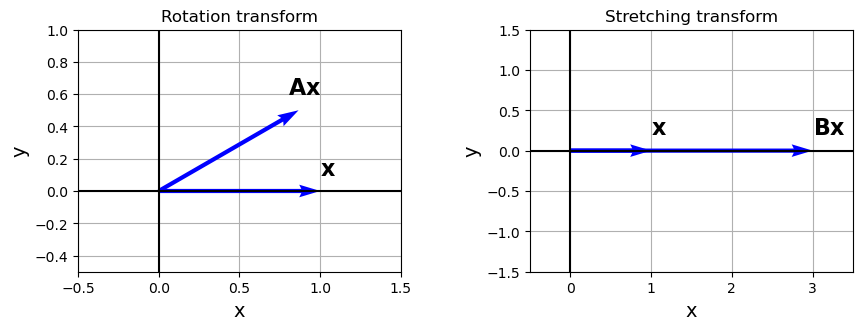

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 15))
plt.subplots_adjust(wspace=0.4)

# Plotting t1
ax1.quiver(
    *origin,
    # 0, 0,
    t1[0, 0],
    t1[0, 1],
    color=["b", "g"],
    width=0.013,
    angles="xy",
    scale_units="xy",
    scale=1,
)
# upward vector
ax1.quiver(
    *origin,
    t1[1, 0],
    t1[1, 1],
    color=["b", "g"],
    width=0.013,
    angles="xy",
    scale_units="xy",
    scale=1,
)
ax1.set_xlabel("x", fontsize=14)
ax1.set_ylabel("y", fontsize=14)
ax1.set_xlim([-0.5, 1.5])
ax1.set_ylim([-0.5, 1])
ax1.set_aspect("equal")
ax1.grid(True)
ax1.set_axisbelow(True)
ax1.set_title("Rotation transform")
ax1.axhline(y=0, color="k")
ax1.axvline(x=0, color="k")
ax1.text(1, 0.1, "$\mathbf{x}$", fontsize=16)
ax1.text(0.8, 0.6, "$\mathbf{Ax}$", fontsize=16)

# Plotting t2
ax2.quiver(
    *origin,
    t2[0, 0],
    t2[0, 1],
    color=["b", "g"],
    width=0.013,
    angles="xy",
    scale_units="xy",
    scale=1,
)
ax2.quiver(
    *origin,
    t2[1, 0],
    t2[1, 1],
    color=["b", "g"],
    width=0.013,
    angles="xy",
    scale_units="xy",
    scale=1,
)
ax2.set_xlabel("x", fontsize=14)
ax2.set_ylabel("y", fontsize=14)
ax2.set_xlim([-0.5, 3.5])
ax2.set_ylim([-1.5, 1.5])
ax2.set_aspect("equal")
ax2.grid(True)
ax2.set_axisbelow(True)
ax2.set_title("Stretching transform")
ax2.axhline(y=0, color="k")
ax2.axvline(x=0, color="k")
ax2.text(1, 0.2, "$\mathbf{x}$", fontsize=16)
ax2.text(3, 0.2, "$\mathbf{Bx}$", fontsize=16)

In [6]:
inputList = ["TutorialsPoint", "Python", "Codes", "hello", 5, "everyone", 10, 5.3]
print(*inputList)
asdf = [[0], [1], [2], [3], [4], [5], [6], [7]]
print(*asdf)

TutorialsPoint Python Codes hello 5 everyone 10 5.3
[0] [1] [2] [3] [4] [5] [6] [7]


In [7]:
# Creating the vectors for a circle and storing them in x
xi1 = np.linspace(-1.0, 1.0, 100)
xi2 = np.linspace(1.0, -1.0, 100)
yi1 = np.sqrt(1 - xi1**2)
yi2 = -np.sqrt(1 - xi2**2)

In [8]:
xi = np.concatenate((xi1, xi2), axis=0)
yi = np.concatenate((yi1, yi2), axis=0)
x = np.vstack((xi, yi))
xi.shape, yi.shape, x.shape

((200,), (200,), (2, 200))

In [9]:
# getting a sample vector from x
x_sample1 = x[:, 65]
x_sample2 = x[:, 100]
x_sample1

array([0.31313131, 0.94970984])

In [10]:
A = np.array([[3, 2], [0, 2]])

t = A @ x  # Vectors in t are the transformed vectors of x
t.shape

(2, 200)

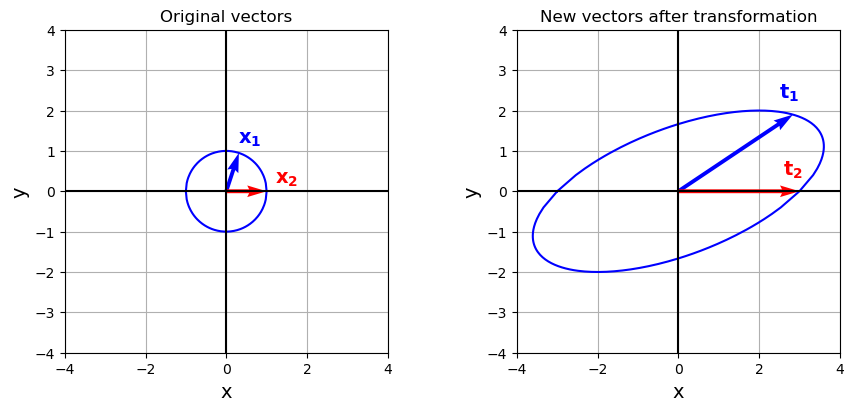

In [11]:
t_sample1 = t[:, 65]
t_sample2 = t[:, 100]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 15))
plt.subplots_adjust(wspace=0.4)

# Plotting x
ax1.plot(x[0, :], x[1, :], color="b")
ax1.quiver(
    *origin,
    x_sample1[0],
    x_sample1[1],
    color=["b"],
    width=0.012,
    angles="xy",
    scale_units="xy",
    scale=1
)
ax1.quiver(
    *origin,
    x_sample2[0],
    x_sample2[1],
    color=["r"],
    width=0.012,
    angles="xy",
    scale_units="xy",
    scale=1
)
ax1.set_xlabel("x", fontsize=14)
ax1.set_ylabel("y", fontsize=14)
ax1.set_xlim([-4, 4])
ax1.set_ylim([-4, 4])
ax1.set_aspect("equal")
ax1.grid(True)
ax1.set_axisbelow(True)
ax1.set_title("Original vectors")
ax1.axhline(y=0, color="k")
ax1.axvline(x=0, color="k")
ax1.text(0.3, 1.2, "$\mathbf{x_1}$", color="b", fontsize=14)
ax1.text(1.2, 0.2, "$\mathbf{x_2}$", color="r", fontsize=14)

# Plotting t
ax2.plot(t[0, :], t[1, :], color="b")
ax2.quiver(
    *origin,
    t_sample1[0],
    t_sample1[1],
    color=["b"],
    width=0.012,
    angles="xy",
    scale_units="xy",
    scale=1
)
ax2.quiver(
    *origin,
    t_sample2[0],
    t_sample2[1],
    color=["r"],
    width=0.012,
    angles="xy",
    scale_units="xy",
    scale=1
)

ax2.set_xlabel("x", fontsize=14)
ax2.set_ylabel("y", fontsize=14)
ax2.set_xlim([-4, 4])
ax2.set_ylim([-4, 4])
ax2.set_aspect("equal")
ax2.grid(True)
ax2.set_axisbelow(True)
ax2.set_title("New vectors after transformation")
ax2.axhline(y=0, color="k")
ax2.axvline(x=0, color="k")
ax2.text(2.5, 2.3, "$\mathbf{t_1}$", color="b", fontsize=14)
ax2.text(2.6, 0.4, "$\mathbf{t_2}$", color="r", fontsize=14)

plt.show()

In [5]:
# Listing 3
B = np.array([[-1, 1], [0, -2]])
lam, u = LA.eig(B)
print("lam=", np.round(lam, 4))
print("u=", np.round(u, 4))
lam, u[:, 0], u[:, 1]

lam= [-1. -2.]
u= [[ 1.     -0.7071]
 [ 0.      0.7071]]


(array([-1., -2.]), array([1., 0.]), array([-0.70710678,  0.70710678]))

In [13]:
w, v = LA.eig(np.array(np.array([[1, -1], [1, 1]])))
w, v

(array([1.+1.j, 1.-1.j]),
 array([[0.70710678+0.j        , 0.70710678-0.j        ],
        [0.        -0.70710678j, 0.        +0.70710678j]]))

In [14]:
# Listing 4
A = np.array([[3, 2], [0, 2]])
lam, u = LA.eig(A)
print("lam=", np.round(lam, 4))
print("u=", np.round(u, 4))

lam= [3. 2.]
u= [[ 1.     -0.8944]
 [ 0.      0.4472]]


Text(2, 2.3, '$\\mathbf{Ax}$')

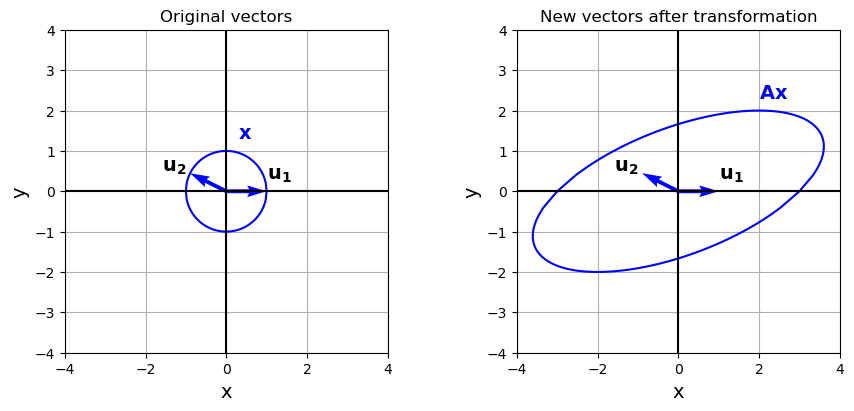

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 15))
plt.subplots_adjust(wspace=0.4)

# Plotting x
ax1.plot(x[0, :], x[1, :], color="b")
ax1.quiver(
    *origin,
    u[0, 0],
    u[1, 0],
    color=["b"],
    width=0.012,
    angles="xy",
    scale_units="xy",
    scale=1
)
ax1.quiver(
    *origin,
    u[0, 1],
    u[1, 1],
    color=["b"],
    width=0.012,
    angles="xy",
    scale_units="xy",
    scale=1
)
ax1.set_xlabel("x", fontsize=14)
ax1.set_ylabel("y", fontsize=14)
ax1.set_xlim([-4, 4])
ax1.set_ylim([-4, 4])
ax1.set_aspect("equal")
ax1.grid(True)
ax1.set_title("Original vectors")
ax1.axhline(y=0, color="k")
ax1.axvline(x=0, color="k")
ax1.text(1, 0.3, "$\mathbf{u_1}$", fontsize=14)
ax1.text(-1.6, 0.5, "$\mathbf{u_2}$", fontsize=14)
ax1.text(0.3, 1.3, "$\mathbf{x}$", color="b", fontsize=14)

# Plotting t
t = A @ x  # Vectors in t are the transformed vectors of x

ax2.plot(t[0, :], t[1, :], color="b")
ax2.quiver(
    *origin,
    u[0, 0],
    u[1, 0],
    color=["b"],
    width=0.012,
    angles="xy",
    scale_units="xy",
    scale=1
)
ax2.quiver(
    *origin,
    u[0, 1],
    u[1, 1],
    color=["b"],
    width=0.012,
    angles="xy",
    scale_units="xy",
    scale=1
)
ax2.set_xlabel("x", fontsize=14)
ax2.set_ylabel("y", fontsize=14)
ax2.set_xlim([-4, 4])
ax2.set_ylim([-4, 4])
ax2.set_aspect("equal")
ax2.grid(True)
ax2.set_title("New vectors after transformation")
ax2.axhline(y=0, color="k")
ax2.axvline(x=0, color="k")
ax2.text(1, 0.3, "$\mathbf{u_1}$", fontsize=14)
ax2.text(-1.6, 0.5, "$\mathbf{u_2}$", fontsize=14)
ax2.text(2, 2.3, "$\mathbf{Ax}$", color="b", fontsize=14)

In [16]:
# The Basis
v_1 = np.array([[1], [0]])
v_2 = np.array([[-1 / mt.sqrt(2)], [1 / mt.sqrt(2)]])

# Change of coordinate matrix
p = np.concatenate([v_1, v_2], axis=1)
p_inv = np.linalg.inv(p)

# Coordinate of x in R^2
x = np.array([[2], [2]])

# New coordinate relative to basis B
x_B = p_inv @ x

print("x_B=", np.round(x_B, 2))

x_B= [[4.  ]
 [2.83]]


In [17]:
# Listing 7
A = np.array([[3, 1], [1, 2]])

lam, u = LA.eig(A)
u1 = u[:, 0].reshape(2, 1)
lam1 = lam[0]
# A_1 = lambda_1 * u1 * u1^T
A_1 = lam1 * (u1 @ u1.T)
u2 = u[:, 1].reshape(2, 1)
lam2 = lam[1]
# A_2 = lambda_2 * u2 * u2^T
A_2 = lam2 * (u2 @ u2.T)
print("A_1=", np.round(A_1, 4))
lam, u

A_1= [[2.618 1.618]
 [1.618 1.   ]]


(array([3.61803399, 1.38196601]),
 array([[ 0.85065081, -0.52573111],
        [ 0.52573111,  0.85065081]]))

In [18]:
# Listing 8
lam_A_1, u_A_1 = LA.eig(A_1)
print("lam=", np.round(lam_A_1, 4))
print("u=", np.round(u_A_1, 4))

lam= [ 3.618 -0.   ]
u= [[ 0.8507 -0.5257]
 [ 0.5257  0.8507]]


In [19]:
# Creating the vectors for a circle and storing them in x
xi1 = np.linspace(-1.0, 1.0, 100)
xi2 = np.linspace(1.0, -1.0, 100)
yi1 = np.sqrt(1 - xi1**2)
yi2 = -np.sqrt(1 - xi2**2)

xi = np.concatenate((xi1, xi2), axis=0)
yi = np.concatenate((yi1, yi2), axis=0)
x = np.vstack((xi, yi))

Text(1.6, 2.3, '$\\lambda_1\\mathbf{u_1}\\mathbf{u_1}^T\\mathbf{x}$')

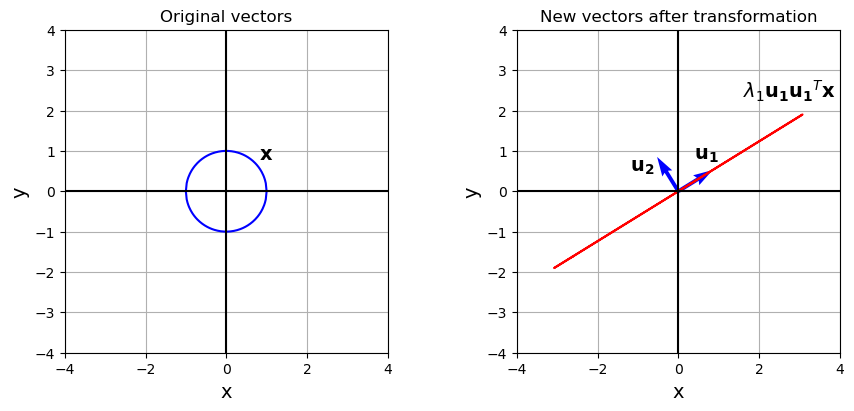

In [20]:
t = A_1 @ x  # Vectors in t are the transformed vectors of x

# getting the transformed sample of x from t
t_sample = t[:, 100]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 15))

plt.subplots_adjust(wspace=0.4)

# Plotting s
ax1.plot(x[0, :], x[1, :], color="b")
ax1.set_xlabel("x", fontsize=14)
ax1.set_ylabel("y", fontsize=14)
ax1.set_xlim([-4, 4])
ax1.set_ylim([-4, 4])
ax1.set_aspect("equal")
ax1.grid(True)
ax1.set_title("Original vectors")
ax1.axhline(y=0, color="k")
ax1.axvline(x=0, color="k")
ax1.text(0.8, 0.8, "$\mathbf{x}$", fontsize=14)

# Plotting t
ax2.plot(t[0, :], t[1, :], color="r")
ax2.quiver(
    *origin,
    u[0, 0],
    u[1, 0],
    color=["b"],
    width=0.012,
    angles="xy",
    scale_units="xy",
    scale=1
)
ax2.quiver(
    *origin,
    u[0, 1],
    u[1, 1],
    color=["b"],
    width=0.012,
    angles="xy",
    scale_units="xy",
    scale=1
)
ax2.set_xlabel("x", fontsize=14)
ax2.set_ylabel("y", fontsize=14)
ax2.set_xlim([-4, 4])
ax2.set_ylim([-4, 4])
ax2.set_aspect("equal")
ax2.grid(True)
ax2.set_title("New vectors after transformation")
ax2.axhline(y=0, color="k")
ax2.axvline(x=0, color="k")
ax2.text(0.4, 0.8, "$\mathbf{u_1}$", fontsize=14)
ax2.text(-1.2, 0.5, "$\mathbf{u_2}$", fontsize=14)
ax2.text(1.6, 2.3, "$\lambda_1\mathbf{u_1}\mathbf{u_1}^T\mathbf{x}$", fontsize=14)

In [21]:
A = np.array([[4, 1, 3], [8, 3, -2]])
lam, v = LA.eig(A.T @ A)
print("lam=", np.round(lam, 4))
print("v=", np.round(v, 4))

lam= [90.1167  0.     12.8833]
v= [[ 0.9415  0.3228  0.0969]
 [ 0.3314 -0.9391 -0.0906]
 [-0.0617 -0.1174  0.9912]]


In [22]:
V = v[:, lam.argsort()[::-1]]

lam_sorted = np.sort(lam)[::-1]
lam_sorted = lam_sorted[lam_sorted > 1e-8]
sigma = np.sqrt(lam_sorted)
Sigma = np.zeros((A.shape[0], A.shape[1]))
Sigma[: min(A.shape[0], A.shape[1]), : min(A.shape[0], A.shape[1])] = np.diag(sigma)

print("Sigma=", np.round(Sigma, 4))
print("V=", np.round(V, 4))

Sigma= [[9.493  0.     0.    ]
 [0.     3.5893 0.    ]]
V= [[ 0.9415  0.0969  0.3228]
 [ 0.3314 -0.0906 -0.9391]
 [-0.0617  0.9912 -0.1174]]


In [23]:
r = len(sigma)
U = A @ V[:, :r] / sigma
print("U=", np.round(U, 4))

U= [[ 0.4121  0.9111]
 [ 0.9111 -0.4121]]


In [4]:
A = np.array([[4, 1, 3], [8, 3, -2]])
U, s, VT = LA.svd(A)
print("U=", np.round(U, 4))
print("s=", np.round(s, 4))
print("V", np.round(VT.T, 4))

Sigma = np.zeros((A.shape[0], A.shape[1]))
Sigma[: min(A.shape[0], A.shape[1]), : min(A.shape[0], A.shape[1])] = np.diag(s)
print("Sigma=", np.round(Sigma, 4))
A_reconstructed = U @ Sigma @ VT
A_approx = U[:, :2] @ Sigma[:2, :2] @ VT[:2, :]
print("approx U=", U[:, :2])
print("approx Sigma=", Sigma[:2, :2])
print("approx VT=", VT[:2, :])
print("Reconstructed A=", A_reconstructed)
print("A approx A=", A_approx)

U= [[-0.4121 -0.9111]
 [-0.9111  0.4121]]
s= [9.493  3.5893]
V [[-0.9415 -0.0969 -0.3228]
 [-0.3314  0.0906  0.9391]
 [ 0.0617 -0.9912  0.1174]]
Sigma= [[9.493  0.     0.    ]
 [0.     3.5893 0.    ]]
approx U= [[-0.4121068  -0.91113555]
 [-0.91113555  0.4121068 ]]
approx Sigma= [[9.49298195 0.        ]
 [0.         3.58933055]]
approx VT= [[-0.94148621 -0.33135146  0.06172462]
 [-0.09686702  0.09059764 -0.9911654 ]]
Reconstructed A= [[ 4.  1.  3.]
 [ 8.  3. -2.]]
A approx A= [[ 4.  1.  3.]
 [ 8.  3. -2.]]


In [25]:
# Reading the image
mat = plt.imread("albert_einstein_grayscale.png")
print("mat.shape=", mat.shape)

mat2 = mat.reshape(mat.shape[0], mat.shape[1] * mat.shape[2])
print("mat2.shape=", mat2.shape)

U, s, VT = LA.svd(mat2)
print("U.shape=", U.shape)
print("s.shape=", s.shape)
print("VT.shape=", VT.shape)
Sigma = np.zeros((mat2.shape[0], mat2.shape[1]))
Sigma[
    : min(mat2.shape[0], mat2.shape[1]), : min(mat2.shape[0], mat2.shape[1])
] = np.diag(s)
print("Sigma.shape=", Sigma.shape)

# Reconstruction of the matrix using the first 30 singular values
k = 30
mat_reconstructed = U @ Sigma @ VT
mat_approx = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :]
print("mat_approx.shape=", mat_approx.shape)
print("mat_reconstructed.shape=", mat_reconstructed.shape)

mat.shape= (623, 468, 4)
mat2.shape= (623, 1872)
U.shape= (623, 623)
s.shape= (623,)
VT.shape= (1872, 1872)
Sigma.shape= (623, 1872)
mat_approx.shape= (623, 1872)
mat_reconstructed.shape= (623, 1872)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Reconstructed image')

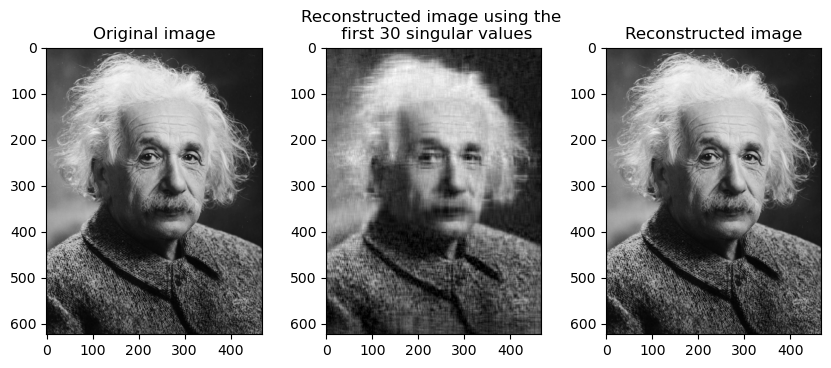

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1.imshow(mat, cmap="gray")
ax1.set_title("Original image")

ax2.imshow(mat_approx.reshape(mat.shape), cmap="gray")
ax2.set_title("Reconstructed image using the \n first {} singular values".format(k))

ax3.imshow(mat_reconstructed.reshape(mat.shape), cmap="gray")
ax3.set_title("Reconstructed image")

(623,) (623, 1) (1872,) (1, 1872)
(623,) (623, 1) (1872,) (1, 1872)
(623,) (623, 1) (1872,) (1, 1872)
(623,) (623, 1) (1872,) (1, 1872)
(623,) (623, 1) (1872,) (1, 1872)
(623,) (623, 1) (1872,) (1, 1872)


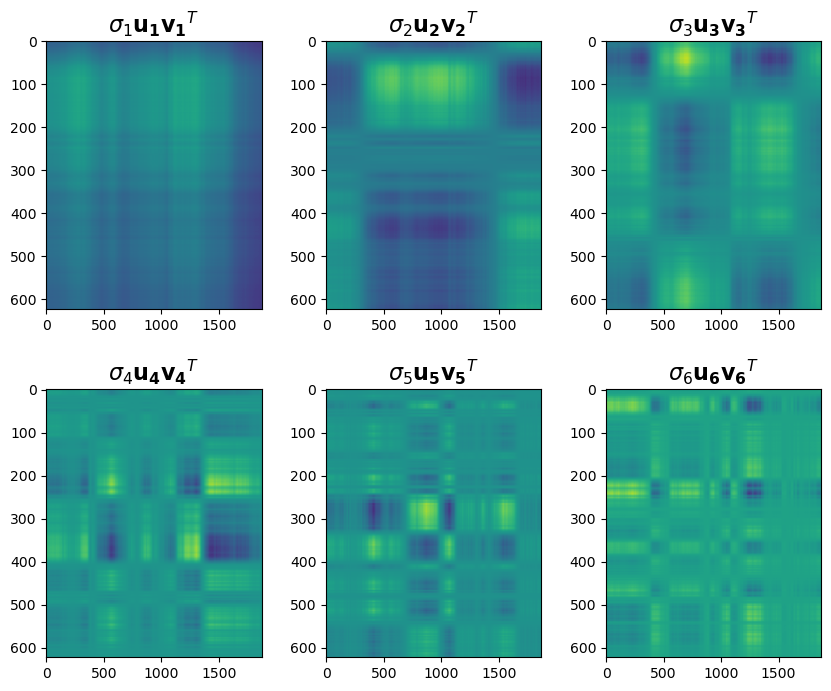

In [27]:
fig, axes = plt.subplots(2, 3, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

for i in range(0, 6):
    mat_i = s[i] * U[:, i].reshape(-1, 1) @ VT[i, :].reshape(1, -1)
    print(
        U[:, i].shape,
        U[:, i].reshape(-1, 1).shape,
        VT[i, :].shape,
        VT[i, :].reshape(1, -1).shape,
    )
    axes[i // 3, i % 3].imshow(mat_i, aspect="auto")
    axes[i // 3, i % 3].set_title(
        "$\sigma_{0}\mathbf{{u_{0}}}\mathbf{{v_{0}}}^T$".format(i + 1), fontsize=16
    )

(500, 750, 4)
(500, 3000)


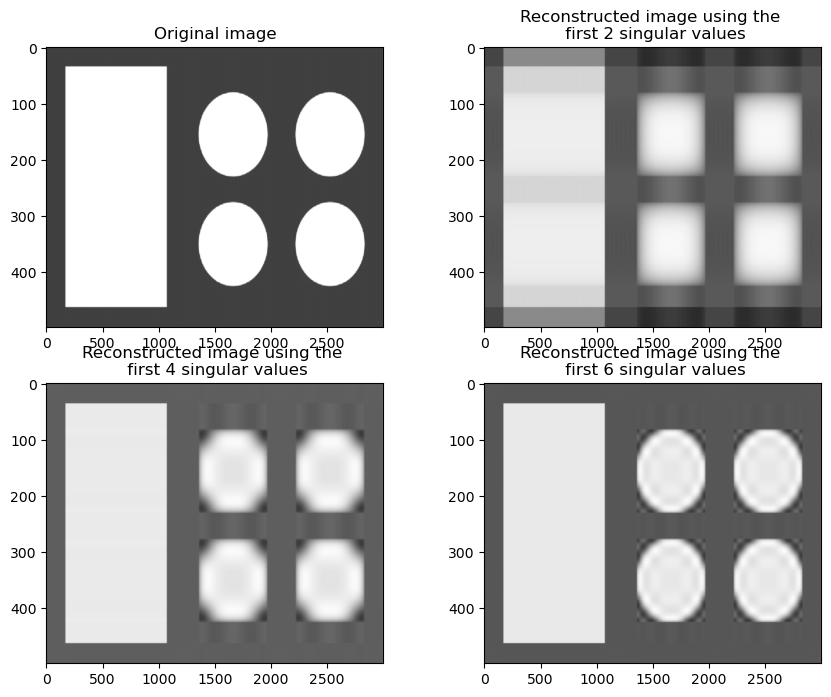

In [28]:
mat_original = plt.imread("shapes.png")

print(mat_original.shape)
mat = mat_original.reshape(
    mat_original.shape[0], mat_original.shape[1] * mat_original.shape[2]
)
print(mat.shape)

# SVD
U, s, VT = LA.svd(mat)

Sigma = np.zeros((mat.shape[0], mat.shape[1]))
Sigma[: min(mat.shape[0], mat.shape[1]), : min(mat.shape[0], mat.shape[1])] = np.diag(s)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

axes[0, 0].imshow(mat, cmap="gray", aspect="auto")
axes[0, 0].set_title("Original image")

for i in range(1, 4):
    k = i * 2
    # Reconstruction of the matrix using the first k singular values
    mat_approx = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :]

    axes[i // 2, i % 2].imshow(mat_approx, cmap="gray", aspect="auto")
    axes[i // 2, i % 2].set_title(
        "Reconstructed image using the \n first {} singular values".format(k)
    )

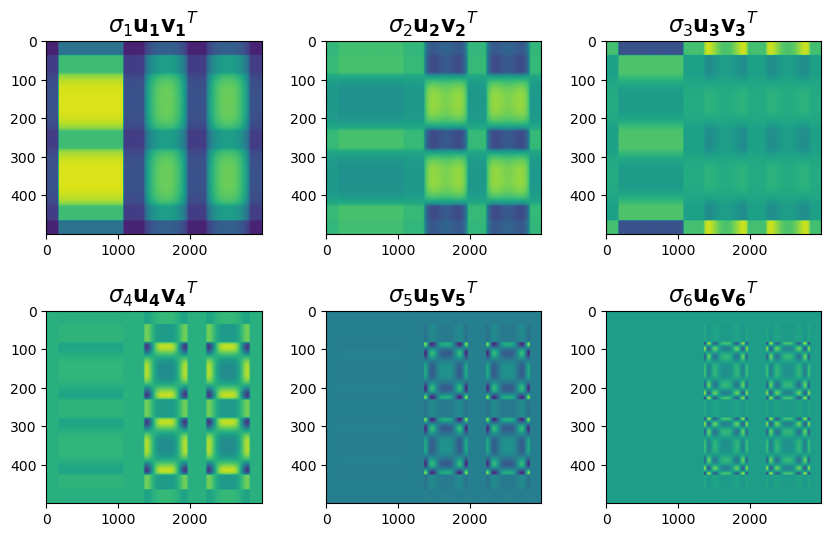

In [29]:
# Listing 18
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

for i in range(0, 6):
    mat_i = s[i] * U[:, i].reshape(-1, 1) @ VT[i, :].reshape(1, -1)
    # mat_i[mat_i < 1e-8] = 0
    axes[i // 3, i % 3].imshow(mat_i, aspect="auto")
    axes[i // 3, i % 3].set_title(
        "$\sigma_{0}\mathbf{{u_{0}}}\mathbf{{v_{0}}}^T$".format(i + 1), fontsize=16
    )

In [30]:
data = fetch_olivetti_faces()
imgs = data.images
print(imgs.shape)

(400, 64, 64)


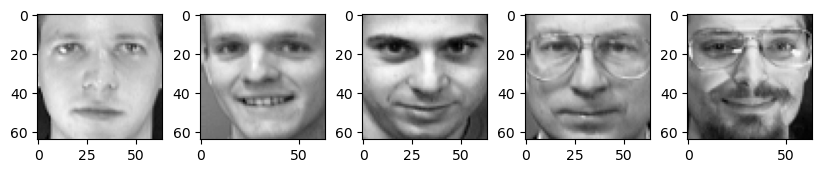

In [31]:
fig, axes = plt.subplots(1, 5, figsize=(10, 4))
plt.subplots_adjust(wspace=0.3)

for i in range(0, 5):
    axes[i].imshow(imgs[i * 40], cmap="gray")

(4096, 1)


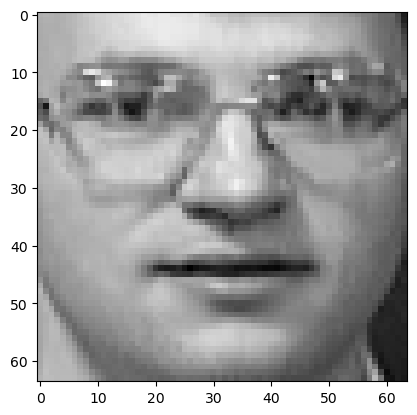

In [32]:
M = imgs.reshape(-1, imgs.shape[1] * imgs.shape[2]).T

x = np.zeros((400, 1))
x[50, 0] = 1
y = M @ x
print(y.shape)
plt.imshow(y.reshape(64, 64), cmap="gray")

((4096, 400), (4096, 4096), (400,), (400, 400))

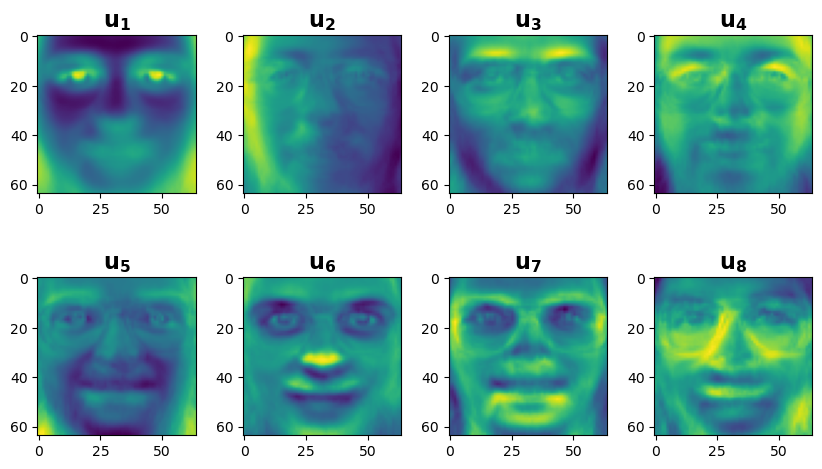

In [33]:
U, s, VT = LA.svd(M)

fig, axes = plt.subplots(2, 4, figsize=(10, 6))
plt.subplots_adjust(wspace=0.3, hspace=0.1)

for i in range(0, 8):
    axes[i // 4, i % 4].imshow(U[:, i].reshape(64, 64))
    axes[i // 4, i % 4].set_title("$\mathbf{{u_{0}}}$".format(i + 1), fontsize=16)

M.shape, U.shape, s.shape, VT.shape

(16777216, 16777216, (4096, 4096), 400, (4096, 400), 160000, (400, 400))

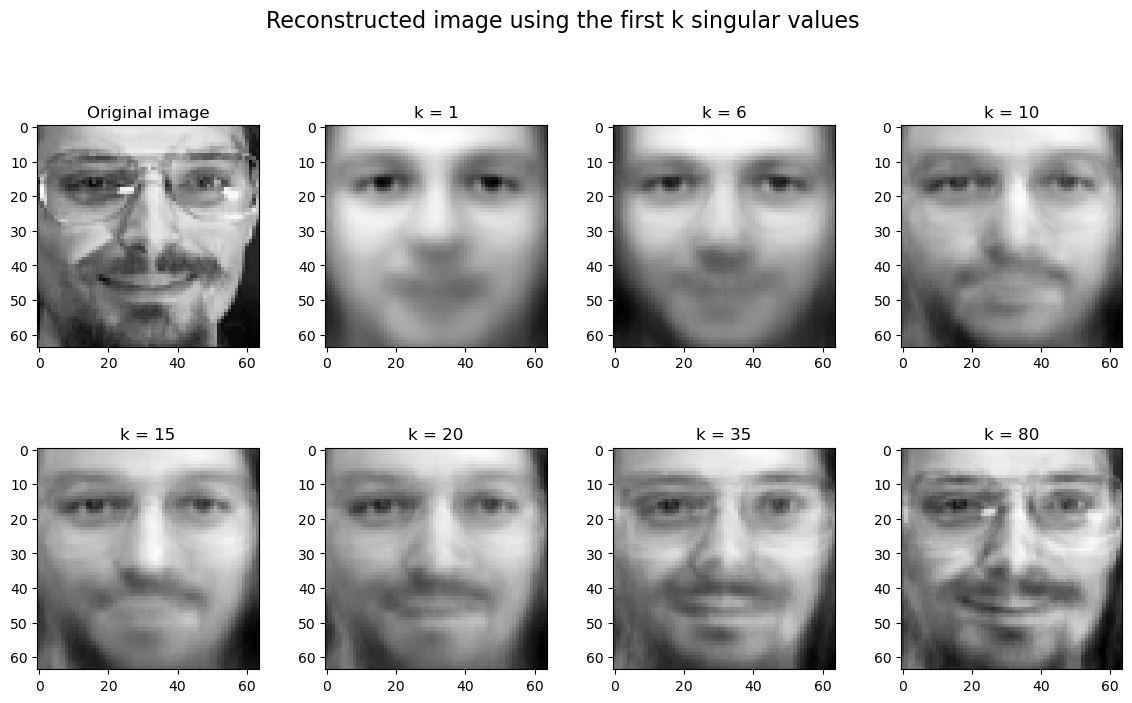

In [39]:
x = np.zeros((400, 1))
x[160, 0] = 1
Sigma = np.zeros((M.shape[0], M.shape[1]))
Sigma[: min(M.shape[0], M.shape[1]), : min(M.shape[0], M.shape[1])] = np.diag(s)

fig, axes = plt.subplots(2, 4, figsize=(14, 8))
fig.suptitle("Reconstructed image using the first k singular values", fontsize=16)
plt.subplots_adjust(wspace=0.3, hspace=0.1)

axes[0, 0].imshow(imgs[160], cmap="gray")
axes[0, 0].set_title("Original image")

k_list = [1, 6, 10, 15, 20, 35, 80]
for i in range(1, 8):
    # Reconstruction of the matrix using the first k singular values
    k = k_list[i - 1]
    mat_approx = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :] @ x

    axes[i // 4, i % 4].imshow(mat_approx.reshape((64, 64)), cmap="gray")
    axes[i // 4, i % 4].set_title("k = {}".format(k))

np.count_nonzero(U), 4096 * 4096, U.shape, np.count_nonzero(
    Sigma
), Sigma.shape, np.count_nonzero(VT), VT.shape

(196, 1516)
[0.05816137 0.88220919 0.27637357 ... 0.79189858 0.86799026 0.10688438]


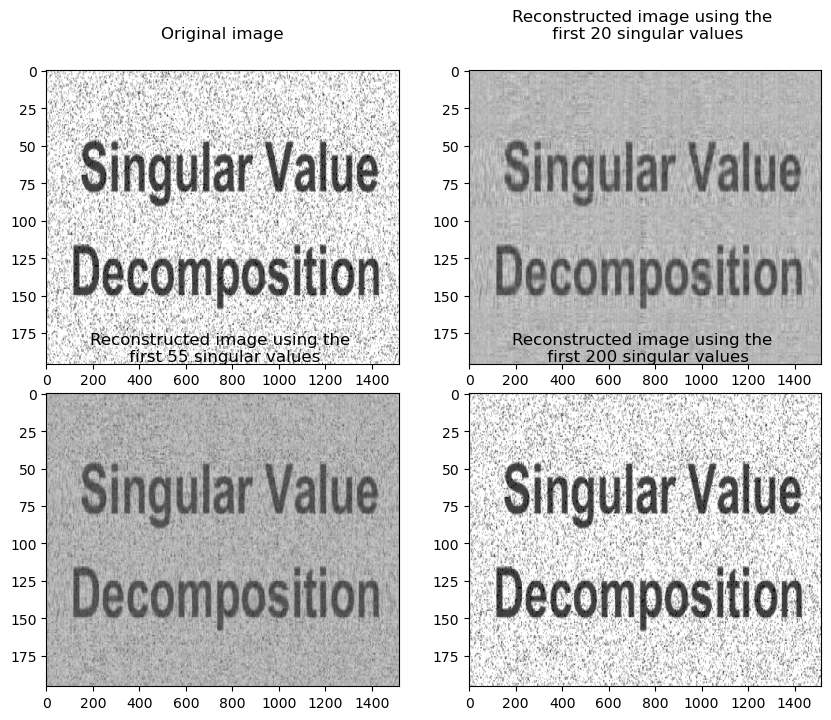

In [8]:
# Reading the image
mat = plt.imread("text.png")
mat = mat.reshape(-1, mat.shape[1] * mat.shape[2])

# Adding noise
noise = np.random.rand(mat.shape[0], mat.shape[1])
print(noise.shape)
print(noise[0])
mat[noise > 0.95] = 0

# SVD
U, s, VT = LA.svd(mat)

Sigma = np.zeros((mat.shape[0], mat.shape[1]))
Sigma[: min(mat.shape[0], mat.shape[1]), : min(mat.shape[0], mat.shape[1])] = np.diag(s)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.2, hspace=0.1)

axes[0, 0].imshow(mat, cmap="gray", aspect="auto")
axes[0, 0].set_title("Original image", y=1.08)

k_list = [20, 55, 200]
for i in range(1, 4):
    k = k_list[i - 1]
    mat_rank_k = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :]
    axes[i // 2, i % 2].imshow(mat_rank_k, cmap="gray", aspect="auto")
    axes[i // 2, i % 2].set_title(
        "Reconstructed image using the \n first {} singular values".format(k), y=1.08
    )

(array([6.22019645, 3.33963431, 1.08558682]),
 array([[-0.00411226,  0.99993525,  0.01061068],
        [-0.73061129,  0.00424058, -0.68278046],
        [-0.68278125, -0.01056005,  0.73054654]]))

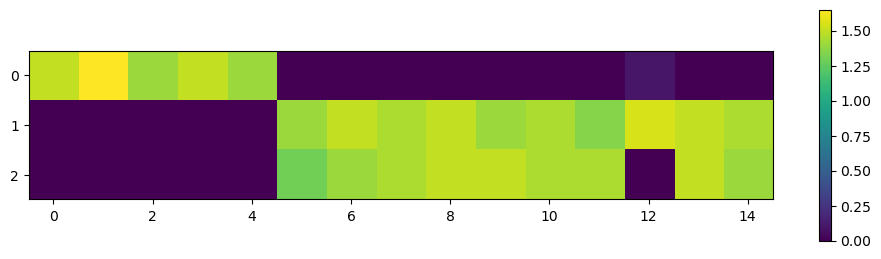

In [13]:
# Defining the matrix
mat = np.array(
    [
        [1.5, 1.65, 1.4, 1.5, 1.4, 0, 0, 0, 0, 0, 0, 0, 0.1, 0, 0],
        [0, 0, 0, 0, 0, 1.4, 1.5, 1.45, 1.5, 1.4, 1.45, 1.35, 1.55, 1.5, 1.45],
        [0, 0, 0, 0, 0, 1.3, 1.4, 1.45, 1.5, 1.5, 1.45, 1.45, 0, 1.5, 1.4],
    ]
)

fig, ax = plt.subplots(1, 1, figsize=(12, 3))
pos = ax.imshow(mat)
fig.colorbar(pos, ax=ax)

U, s, VT = LA.svd(mat)
s, U